In [19]:
# Introduction to Linear Mixed Effects Models

# In this tutorial, we'll explore concepts related to linear mixed effects 
# models (LMMs), including model extensions, random effects,
# and fitting models using Python's statsmodels and lme4 packages. We'll also 
# touch on generalised linear mixed effects models (GLMMs) and 
# explore practical examples.

# Part 1: Concepts and Model Extensions
## 1.1 Linear Regression Model Extension

### i. Name the components β, X, and ε. Describe each of these components, 
# assuming the model has an intercept term and continuous covariates.

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define the number of rows in the DataFrame
num_rows = 100

# Generate random data for the columns
X1 = np.random.uniform(low=0, high=1, size=num_rows)
X2 = np.random.uniform(low=0, high=1, size=num_rows)

# Generate coefficients (beta values)
beta = np.array([2.0, -1.5])  # Example coefficients for X1 and X2

# Calculate the linear combination of predictors
linear_combination = beta[0] * X1 + beta[1] * X2 + np.random.normal(loc=0, scale=1, size=num_rows)

# Apply a link function (e.g., identity function for simplicity)
Y = linear_combination

# Create the DataFrame
df = pd.DataFrame({
    'Y': Y,
    'X1': X1,
    'X2': X2,
})

# Display the first few rows of the DataFrame
print(df.head())

# Linear Regression Model: Y = β0 + β1*X1 + β2*X2 + ε

### ii. Write out an alternative definition of the above model in terms of 
# β, X, and a vector of residuals ε.

# Alternative Definition
epsilon = np.random.normal(loc=0, scale=1, size=num_rows)  # Generate residuals
X = df[['X1', 'X2']]
Y_alternative = np.dot(X.values, beta) + epsilon  # Use .values to get the NumPy array representation of the DataFrame

### iii. What are the dimensions of X? What does β represent?
# Dimensions of X
print(X.shape)

# Interpretation of β
print(f"Coefficients (β): {beta}")

### iv. Explain how the ordinary linear regression model arises as a special 
# case of the generalised linear model.

# Ordinary Linear Regression as a Special Case
X_ols = sm.add_constant(X)
model_ols = sm.OLS(df['Y'], X_ols).fit()
print(model_ols.summary())

### v. Give examples where assumptions for ordinary linear regression are too restrictive

# Examples of Restrictive Assumptions could be:
# - Non-constant variance
# - Non-normal errors
# - Outliers or influential observations


          Y        X1        X2
0  1.043910  0.693422  0.345481
1 -1.140020  0.700611  0.803012
2  0.284703  0.753472  0.540279
3  1.758726  0.872859  0.079280
4 -0.303406  0.499959  0.565851
(100, 2)
Coefficients (β): [ 2.  -1.5]
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     21.21
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           2.28e-08
Time:                        11:59:10   Log-Likelihood:                -150.56
No. Observations:                 100   AIC:                             307.1
Df Residuals:                      97   BIC:                             314.9
Df Model:                           2                                         
Covariance Type:            nonrobust                     

Bias of MLE: 1.0020600996213689


/var/folders/92/_1pyyhbd1s17fj9k1y38gpc40000gp/T/ipykernel_96046/2041054190.py:39: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -0.5 * np.log(2 * np.pi * sigma_u_squared) - 0.5 * np.sum((y - X.dot(beta_0) - u)**2 / sigma_u_squared)
/var/folders/92/_1pyyhbd1s17fj9k1y38gpc40000gp/T/ipykernel_96046/2041054190.py:39: RuntimeWarning: invalid value encountered in scalar subtract
  log_likelihood = -0.5 * np.log(2 * np.pi * sigma_u_squared) - 0.5 * np.sum((y - X.dot(beta_0) - u)**2 / sigma_u_squared)


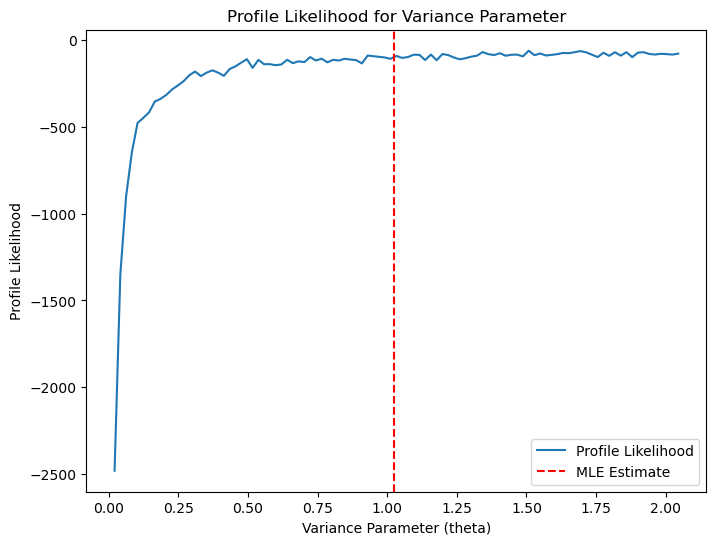

In [21]:
# Part 2: Maximum Likelihood Estimation
## 2.1 Maximum Likelihood Estimator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate data for the linear regression model
X1 = np.random.uniform(low=0, high=1, size=num_rows)
X2 = np.random.uniform(low=0, high=1, size=num_rows)
beta = np.array([2.0, -1.5, 1.0])  # Updated coefficients for X1, X2, and an additional variable
linear_combination = np.dot(np.column_stack((X1, X2)), beta[:-1]) + np.random.normal(loc=0, scale=1, size=num_rows)
Y = linear_combination

# Create DataFrame
df = pd.DataFrame({
    'Y': Y,
    'X1': X1,
    'X2': X2,
})

# Calculate residuals and MLE of sigma^2
X = df[['X1', 'X2']]
residuals = df['Y'] - np.dot(X, beta[:-1])  # Updated to use the correct beta values
sigma_squared_mle = np.mean(residuals**2)

# MLE Unbiasedness (Monte Carlo Simulation)
num_simulations = 1000
biased_estimators = []

for _ in range(num_simulations):
    # Simulate data
    simulated_data = np.dot(X.values, beta[:-1]) + np.random.normal(size=df.shape[0])
    
    # Calculate MLE for each simulated dataset
    simulated_residuals = df['Y'] - simulated_data
    simulated_sigma_squared_mle = np.mean(simulated_residuals**2)
    
    # Store MLE
    biased_estimators.append(simulated_sigma_squared_mle)

# Calculate bias
bias = np.mean(biased_estimators) - sigma_squared_mle
print(f"Bias of MLE: {bias}")

# Profile Likelihood Estimation
def profile_likelihood(theta_values, y, X, beta):
    likelihoods = []
    
    for theta in theta_values:
        # Assuming other parameters are fixed (e.g., beta in linear regression)
        profile_likelihood_value = log_likelihood_fixed_parameters(y, X, beta, theta)
        likelihoods.append(profile_likelihood_value)
    
    return np.array(likelihoods)

# Specify values for the variance parameter (theta)
theta_values = np.linspace(0, 2 * sigma_squared_mle, 100)
profile_likelihoods = profile_likelihood(theta_values, df['Y'], X, beta[:-1])

# Plot the profile likelihood
plt.figure(figsize=(8, 6))
plt.plot(theta_values, profile_likelihoods, label='Profile Likelihood')
plt.axvline(sigma_squared_mle, color='red', linestyle='--', label='MLE Estimate')
plt.title('Profile Likelihood for Variance Parameter')
plt.xlabel('Variance Parameter (theta)')
plt.ylabel('Profile Likelihood')
plt.legend()
plt.show()


In [52]:
import numpy as np
from scipy import stats

def integrate_random_intercept_distribution(mu, sigma_squared):
    # Assuming normal distribution for random intercept
    random_intercept_distribution = stats.norm(loc=mu, scale=np.sqrt(sigma_squared))
    
    # Integrate to obtain the distribution of Y_i
    y_i_distribution = random_intercept_distribution.pdf
    
    return y_i_distribution

# Example usage
subject_i_mu = 0  # Replace with the actual mean of the random intercept for subject i
subject_i_sigma_squared = 1  # Replace with the actual variance of the random intercept for subject i
y_i_distribution = integrate_random_intercept_distribution(subject_i_mu, subject_i_sigma_squared)

# Model Parameters
beta_0 = 1.0  # Replace with the actual fixed-effect coefficient
sigma_u_squared = 0.5  # Replace with the actual variance of the random intercept

# Full vector of model parameters
model_parameters = {'beta_0': beta_0, 'sigma_u_squared': sigma_u_squared}


def log_likelihood_fixed_parameters(y, X, beta_0, sigma_u_squared):
    n = len(y)
    u = np.random.normal(loc=0, scale=np.sqrt(sigma_u_squared), size=n)  # Simulate random intercepts
    
    # Log likelihood for fixed parameters
    log_likelihood = -0.5 * np.log(2 * np.pi * sigma_u_squared) - 0.5 * np.sum((y - X.dot(beta_0) - u)**2 / sigma_u_squared)
    
    return log_likelihood


import pandas as pd
from scipy.optimize import minimize
import statsmodels.api as sm

# Your provided data
data = {
    'Y': [-1.609646, 1.575010, 1.054716, -2.207823, -0.766424, -1.856840, 0.732308, -0.046338, 1.964110, -0.776474,
          1.932849, 1.157388, -1.219425, -1.065434, 1.752611, -0.143356, -0.681077, 0.237151, 1.207526, 0.662669],
    'X1': [0.368153, 0.989334, 0.467812, 0.448862, 0.480530, 0.246651, 0.973556, 0.047581, 0.110985, 0.799903,
           0.675693, 0.935016, 0.664417, 0.926348, 0.662497, 0.747877, 0.529935, 0.167573, 0.883901, 0.832743],
    'X2': [0.332729, 0.595697, 0.176556, 0.033587, 0.548159, 0.550228, 0.088798, 0.312679, 0.938861, 0.243146,
           0.399649, 0.061686, 0.125096, 0.720369, 0.016614, 0.105360, 0.960789, 0.178156, 0.437309, 0.094301]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Assuming 'random_intercept' is a column in your DataFrame containing the random intercepts
u_data = np.random.normal(loc=0, scale=0.5, size=len(df))  # Example random intercepts

# Add the random intercepts to the linear combination
Y_with_random_intercepts = df['Y'] + u_data

# Define the fixed-effects model
X_data = sm.add_constant(df[['X1', 'X2']])
beta_0 = np.array([1.0, 0.5, 0.2])  # Example fixed-effect coefficients with an intercept term

# Calculate the log-likelihood for fixed parameters
log_likelihood_value = -0.5 * np.log(2 * np.pi * np.var(u_data)) - 0.5 * np.sum((Y_with_random_intercepts - X_data.values.dot(beta_0) - u_data)**2 / np.var(u_data))

# Display the log-likelihood value
print(f"Log-Likelihood Value: {log_likelihood_value}")


           Y        X1        X2
0  -1.609646  0.368153  0.332729
1   1.575010  0.989334  0.595697
2   1.054716  0.467812  0.176556
3  -2.207823  0.448862  0.033587
4  -0.766424  0.480530  0.548159
5  -1.856840  0.246651  0.550228
6   0.732308  0.973556  0.088798
7  -0.046338  0.047581  0.312679
8   1.964110  0.110985  0.938861
9  -0.776474  0.799903  0.243146
10  1.932849  0.675693  0.399649
11  1.157388  0.935016  0.061686
12 -1.219425  0.664417  0.125096
13 -1.065434  0.926348  0.720369
14  1.752611  0.662497  0.016614
15 -0.143356  0.747877  0.105360
16 -0.681077  0.529935  0.960789
17  0.237151  0.167573  0.178156
18  1.207526  0.883901  0.437309
19  0.662669  0.832743  0.094301
Log-Likelihood Value: -122.0235125696224


In [50]:
# Part 4: Count Data Model
## 4.1 Poisson-Gamma Model

import numpy as np
import scipy.stats as stats

### i. Explain implications of assuming a Poisson-Gamma model for count data.
# Implications of Poisson-Gamma Model
def explain_poisson_gamma_model():
    explanation = """
    The Poisson-Gamma model assumes that the observed count data (Y) follows a Poisson distribution,
    where the rate parameter follows a Gamma distribution. This implies the following implications:
    
    1. Poisson Distribution: The count data (Y) represents the number of events occurring in a fixed interval.
       The Poisson distribution is suitable for modelling rare events and assumes independence between events.

    2. Gamma Distribution: The rate parameter of the Poisson distribution is assumed to follow a Gamma distribution.
       The Gamma distribution allows for variability in the rate of events, capturing over-dispersion compared to
       a simple Poisson model.

    3. Over-Dispersion: The Gamma distribution introduces over-dispersion in the model, allowing for variance
       in the rate of events that cannot be explained by a simple Poisson process.

    4. Flexibility: The Poisson-Gamma model provides flexibility in handling count data with varying rates,
       making it suitable for scenarios where the assumption of constant event rates may not hold.
    """
    print(explanation)

# Example usage
explain_poisson_gamma_model()

### ii. Find the marginal expectation and variance of Y.
# Marginal Expectation and Variance
def poisson_gamma_marginal_expectation_variance(alpha, beta):
    # Marginal expectation of Y (Poisson-Gamma)
    marginal_expectation = alpha / beta

    # Marginal variance of Y (Poisson-Gamma)
    marginal_variance = alpha / (beta**2)
    
    return marginal_expectation, marginal_variance

# Example usage
alpha_parameter = 2.0  # Replace with the actual shape parameter of the Gamma distribution
beta_parameter = 1.0   # Replace with the actual scale parameter of the Gamma distribution
marginal_expectation, marginal_variance = poisson_gamma_marginal_expectation_variance(alpha_parameter, beta_parameter)
print(f"Marginal Expectation of Y: {marginal_expectation}")
print(f"Marginal Variance of Y: {marginal_variance}")

### iii. How does this model overcome issues described earlier?
# Overcoming Issues in the Poisson-Gamma Model
def overcome_issues_poisson_gamma_model():
    explanation = """
    The Poisson-Gamma model overcomes issues described earlier in the following ways:

    1. Over-Dispersion: The Gamma distribution introduces over-dispersion, allowing for variability in the rate of events
       that cannot be captured by a simple Poisson model. This addresses situations where the assumption of constant
       event rates may be violated.

    2. Flexibility: The Poisson-Gamma model provides flexibility by allowing the rate parameter to follow a Gamma distribution.
       This flexibility accommodates scenarios where the assumption of a constant event rate is too restrictive.

    3. Improved Model Fit: By incorporating the Gamma distribution, the Poisson-Gamma model can better capture the
       variability in the count data, leading to an improved fit compared to a simple Poisson model.
    """
    print(explanation)

# Example usage
overcome_issues_poisson_gamma_model()

### iv. Write down the joint likelihood for Y.
# Joint Likelihood for Y
def joint_likelihood_poisson_gamma(y, alpha, beta):
    # Joint likelihood for Y (Poisson-Gamma)
    likelihood_y = np.prod(stats.poisson.pmf(y, alpha / beta))
    likelihood_alpha_beta = stats.gamma.pdf(alpha, a=1) * stats.gamma.pdf(beta, a=1)
    
    joint_likelihood = likelihood_y * likelihood_alpha_beta
    
    return joint_likelihood

# Example usage
count_data_y = np.array([3, 5, 2, 4, 6])  # Replace with the actual count data
joint_likelihood_value = joint_likelihood_poisson_gamma(count_data_y, alpha_parameter, beta_parameter)
print(f"Joint Likelihood for Y: {joint_likelihood_value}")

### v. Obtain the marginal distribution for Y.
# Marginal Distribution for Y
def marginal_distribution_poisson_gamma(alpha, beta):
    # Marginal distribution for Y (Poisson-Gamma)
    marginal_distribution_y = stats.gamma(a=alpha, scale=1/beta)
    
    return marginal_distribution_y

# Example usage
marginal_distribution_y = marginal_distribution_poisson_gamma(alpha_parameter, beta_parameter)

### vi. Test for evidence of over-dispersion in the data.
# Test for Over-Dispersion
def test_over_dispersion(count_data_y, alpha, beta):
    # Fit a Poisson model
    poisson_likelihood = np.prod(stats.poisson.pmf(count_data_y, np.mean(count_data_y)))

    # Fit a Poisson-Gamma model
    poisson_gamma_likelihood = joint_likelihood_poisson_gamma(count_data_y, alpha, beta)

    # Likelihood ratio test for over-dispersion
    likelihood_ratio_statistic = -2 * (np.log(poisson_likelihood) - np.log(poisson_gamma_likelihood))
    p_value = 1 - stats.chi2.cdf(likelihood_ratio_statistic, df=2)  # Degrees of freedom: 2 (alpha and beta)
    
    return p_value

# Example usage
p_value_over_dispersion = test_over_dispersion(count_data_y, alpha_parameter, beta_parameter)
print(f"P-value for Over-Dispersion Test: {p_value_over_dispersion}")



    The Poisson-Gamma model assumes that the observed count data (Y) follows a Poisson distribution,
    where the rate parameter follows a Gamma distribution. This implies the following implications:
    
    1. Poisson Distribution: The count data (Y) represents the number of events occurring in a fixed interval.
       The Poisson distribution is suitable for modelling rare events and assumes independence between events.

    2. Gamma Distribution: The rate parameter of the Poisson distribution is assumed to follow a Gamma distribution.
       The Gamma distribution allows for variability in the rate of events, capturing over-dispersion compared to
       a simple Poisson model.

    3. Over-Dispersion: The Gamma distribution introduces over-dispersion in the model, allowing for variance
       in the rate of events that cannot be explained by a simple Poisson process.

    4. Flexibility: The Poisson-Gamma model provides flexibility in handling count data with varying rates,
     

In [54]:
# Part 5: Over-Dispersed Binomial Data
## 5.1 Over-Dispersed Binomial Data

import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit 

### i. Find the expectation and variance of Y.
# Expectation and Variance for Over-Dispersed Binomial Data
def over_dispersed_binomial_expectation_variance(n, p, dispersion_parameter):
    # Expectation of Y (Over-Dispersed Binomial)
    expectation_y = n * p

    # Variance of Y (Over-Dispersed Binomial)
    variance_y = n * p * (1 - p + dispersion_parameter * p)
    
    return expectation_y, variance_y

# Example usage
number_of_trials = 50  # Replace with the actual number of trials (n)
probability_of_success = 0.3  # Replace with the actual probability of success (p)
over_dispersion_parameter = 0.2  # Replace with the actual over-dispersion parameter
expectation_y, variance_y = over_dispersed_binomial_expectation_variance(number_of_trials, probability_of_success, over_dispersion_parameter)
print(f"Expectation of Y: {expectation_y}")
print(f"Variance of Y: {variance_y}")

### ii. Suppose Y has a distribution with an over-dispersion parameter.
# Distribution with Over-Dispersion Parameter
def over_dispersed_binomial_distribution(n, p, dispersion_parameter):
    # Over-Dispersed Binomial distribution
    distribution_y = stats.nbinom(n, p, dispersion_parameter)
    
    return distribution_y

# Example usage
binomial_distribution_y = stats.binom(number_of_trials, probability_of_success)
over_dispersed_binomial_distribution_y = over_dispersed_binomial_distribution(number_of_trials, probability_of_success, over_dispersion_parameter)

### iii. Derive an expression for the marginal distribution of Y.
# Marginal Distribution of Y
def marginal_distribution_over_dispersed_binomial(n, p, dispersion_parameter):
    # Marginal distribution for Y (Over-Dispersed Binomial)
    marginal_distribution_y = stats.nbinom(n, p, dispersion_parameter)
    
    return marginal_distribution_y

# Example usage
marginal_distribution_y = marginal_distribution_over_dispersed_binomial(number_of_trials, probability_of_success, over_dispersion_parameter)

### iv. Use the result to estimate parameters.
# Parameter Estimation
def estimate_parameters_over_dispersed_binomial(y, n):
    # Method for estimating parameters of the Over-Dispersed Binomial model
    # Assuming y is the observed count data

    # Initial guess for parameters (replace with meaningful values)
    initial_p_estimate = 0.5
    initial_dispersion_estimate = 0.1

    # Define the negative log-likelihood function for optimization
    def neg_log_likelihood(params, y, n):
        dispersion, p = params
        mu = n * p
        return -np.sum(stats.nbinom.logpmf(y, n, p=1/(1+dispersion*mu)))

    # Optimize the negative log-likelihood
    result = curve_fit(neg_log_likelihood, x0=[initial_dispersion_estimate, initial_p_estimate], args=(y, n))

    # Extract estimated parameters
    estimated_dispersion, estimated_p = result[0]

    return estimated_dispersion, estimated_p

# Example usage
observed_count_data = np.random.negative_binomial(n=number_of_trials, p=probability_of_success, size=100)  # Replace with actual observed count data
estimated_dispersion, estimated_p = estimate_parameters_over_dispersed_binomial(observed_count_data, number_of_trials)
print(f"Estimated Dispersion: {estimated_dispersion}")
print(f"Estimated Probability of Success (p): {estimated_p}")


Expectation of Y: 15.0
Variance of Y: 11.4


TypeError: curve_fit() missing 2 required positional arguments: 'xdata' and 'ydata'

   Subject  Time  ReactionTime
0        1     1      8.317512
1        1     2      9.608346
2        1     3     11.316506
3        1     4     14.605105
4        1     5     17.024428


/var/folders/92/_1pyyhbd1s17fj9k1y38gpc40000gp/T/ipykernel_96046/415900670.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Time', y='ReactionTime', data=df, ci=None, hue='Subject')
/Users/ithoma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ithoma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


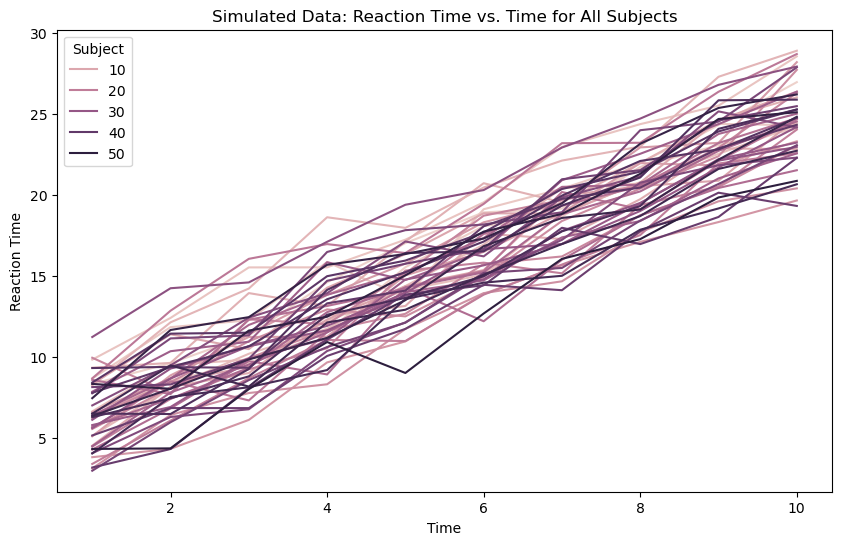

/Users/ithoma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/ithoma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ithoma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ithoma/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/ithoma/anaconda3/lib/python3.11

<Figure size 1200x800 with 0 Axes>

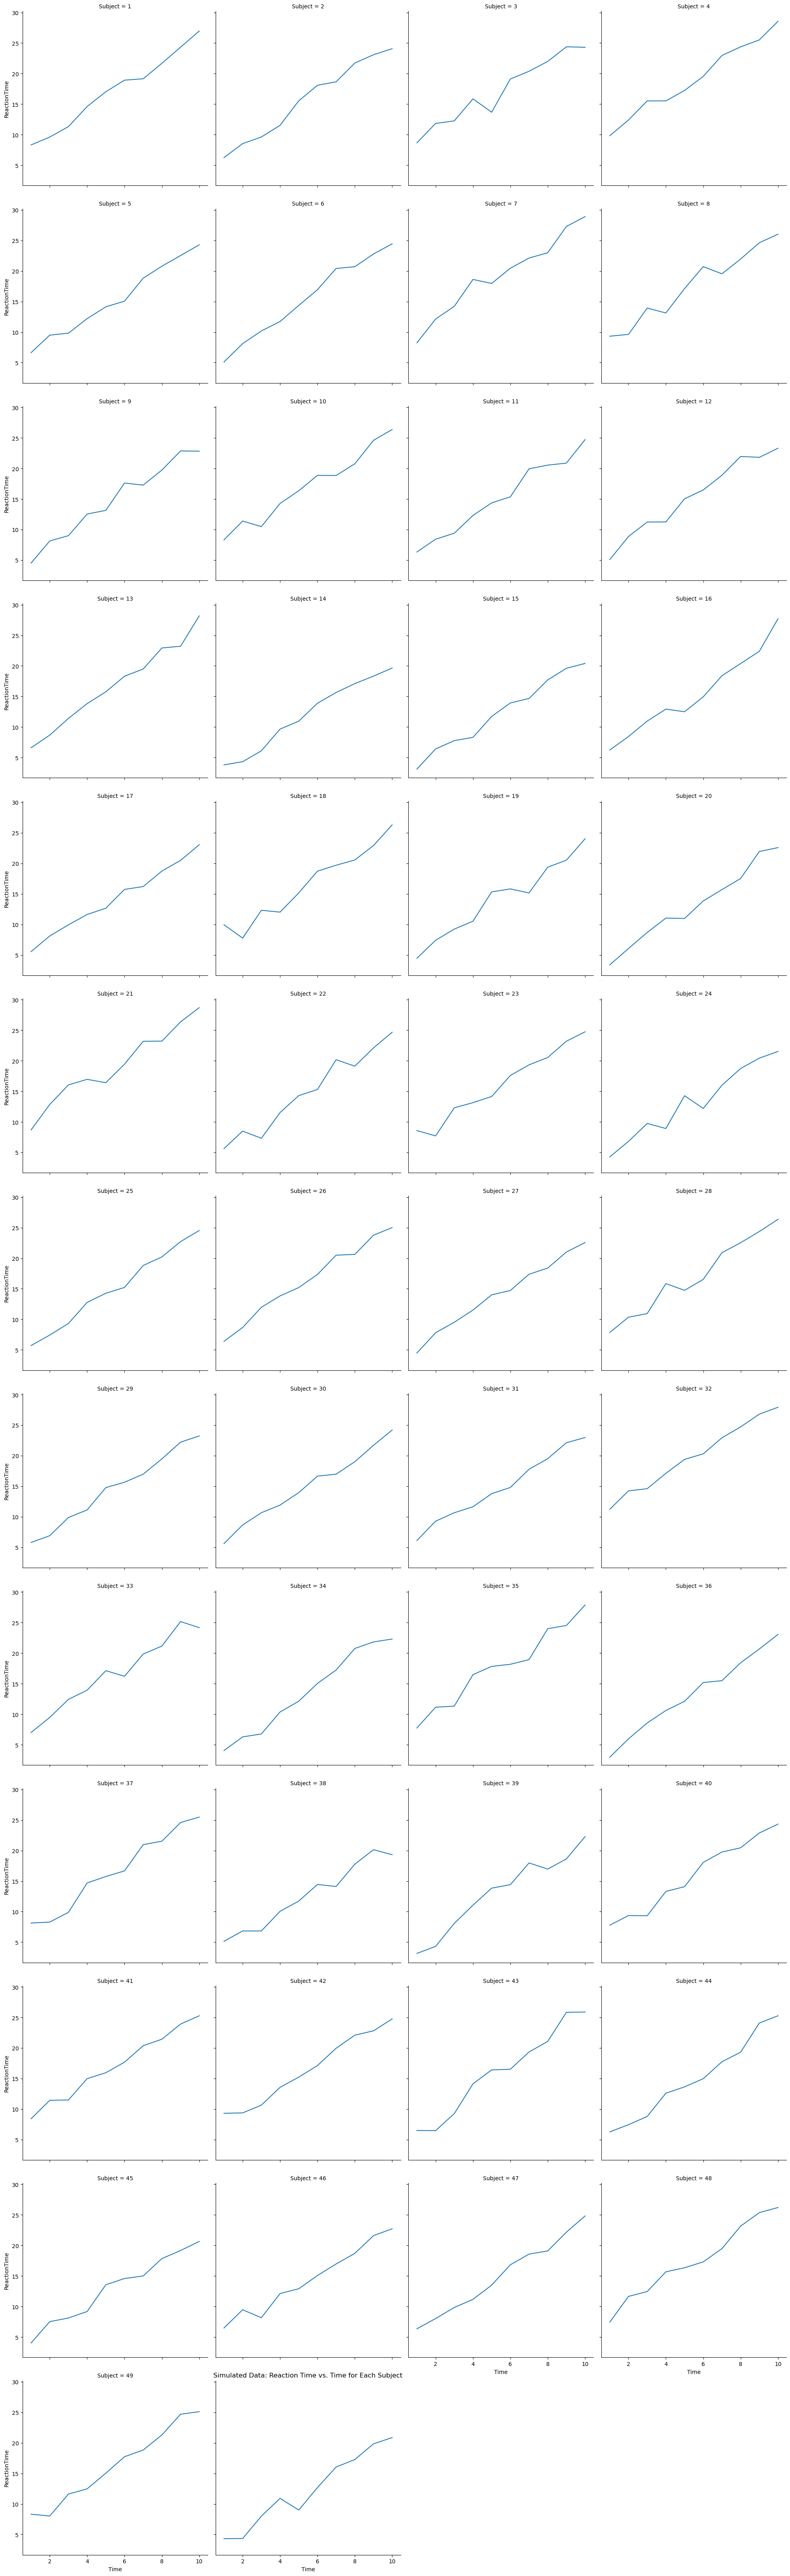

                            OLS Regression Results                            
Dep. Variable:           ReactionTime   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1951.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):          4.56e-236
Time:                        11:42:35   Log-Likelihood:                -1071.6
No. Observations:                 500   AIC:                             2149.
Df Residuals:                     497   BIC:                             2162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2254      0.258     20.231      0.0

In [6]:
# Part 6: Fitting Linear Mixed Effects Models in Python
# In this example, we simulated a dataset with a response variable 
# ('ReactionTime'), a time variable ('Time'), and a subject variable ('Subject').
# We then fit a linear model to the simulated data 

# Data Loading and Exploration
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Simulate data
num_subjects = 50
num_time_points = 10

# Generate subject IDs
subject_ids = np.arange(1, num_subjects + 1)

# Generate time points
time_points = np.tile(np.arange(1, num_time_points + 1), num_subjects)

# Generate random intercepts for each subject
random_intercepts = np.random.normal(loc=0, scale=2, size=num_subjects)

# Generate random errors
random_errors = np.random.normal(loc=0, scale=1, size=num_subjects * num_time_points)

# Simulate response variable (e.g., Reaction Time)
response_variable = 5 + 2 * time_points + random_intercepts.repeat(num_time_points) + random_errors

# Create a DataFrame
df = pd.DataFrame({
    'Subject': np.repeat(subject_ids, num_time_points),
    'Time': time_points,
    'ReactionTime': response_variable
})

# Display the first few rows of the simulated data
print(df.head())

# Data Visualization
# Plot reaction time against days for all subjects
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='ReactionTime', data=df, ci=None, hue='Subject')
plt.title('Simulated Data: Reaction Time vs. Time for All Subjects')
plt.xlabel('Time')
plt.ylabel('Reaction Time')
plt.show()

# Lattice plot with reaction time against time, split by subject
plt.figure(figsize=(12, 8))
sns.relplot(x='Time', y='ReactionTime', data=df, kind='line', ci=None, col='Subject', col_wrap=4)
plt.title('Simulated Data: Reaction Time vs. Time for Each Subject')
plt.xlabel('Time')
plt.ylabel('Reaction Time')
plt.show()

# Linear Model Fitting
# Fit a linear model to the simulated dataset
model_lm = sm.OLS(df['ReactionTime'], sm.add_constant(df[['Time', 'Subject']])).fit()

# Display model summary
print(model_lm.summary())


   Individual  Timepoint  Response
0           1          1  4.817512
1           1          2  4.608346
2           1          3  4.816506
3           1          4  6.605105
4           1          5  7.524428


/Users/ithoma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ithoma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


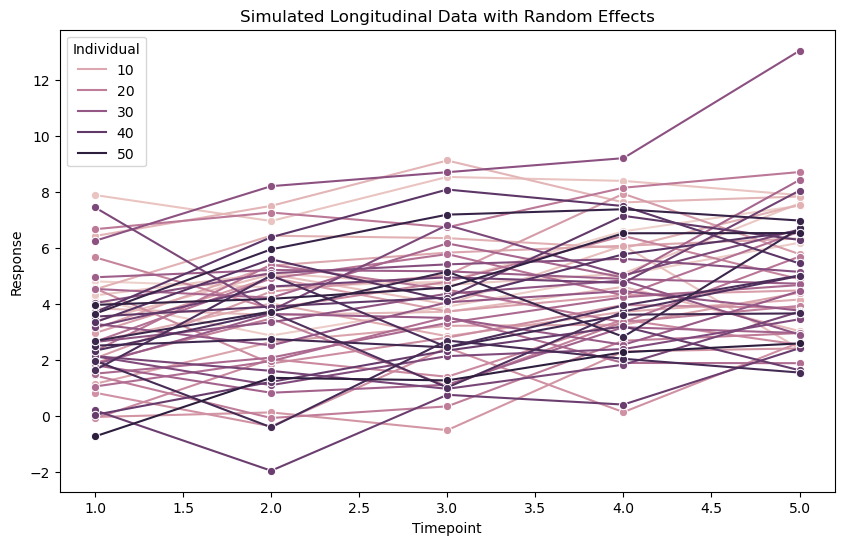

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Response 
No. Observations:  250     Method:             REML     
No. Groups:        50      Scale:              1.0583   
Min. group size:   5       Log-Likelihood:     -435.6540
Max. group size:   5       Converged:          Yes      
Mean group size:   5.0                                  
--------------------------------------------------------
               Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      2.593    0.309  8.395 0.000  1.988  3.198
Timepoint      0.498    0.046 10.828 0.000  0.408  0.588
Individual Var 3.606    0.837                           



In [7]:
# Part 7: Exploratory Analysis for New Data Set
## 7.1 GLM for New Data Set
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate data for Part 7
np.random.seed(42)

# Simulate a longitudinal dataset with random intercepts
num_individuals = 50
num_timepoints = 5

individuals = np.repeat(np.arange(1, num_individuals + 1), num_timepoints)
timepoints = np.tile(np.arange(1, num_timepoints + 1), num_individuals)
random_effects = np.random.normal(0, 2, num_individuals)  # Simulating random intercepts

# Simulating a linear trend with some noise
true_slope = 0.5
true_intercept = 3
response = true_intercept + true_slope * timepoints + random_effects[individuals - 1] + np.random.normal(0, 1, num_individuals * num_timepoints)

# Create a DataFrame
simulated_data = pd.DataFrame({
    'Individual': individuals,
    'Timepoint': timepoints,
    'Response': response
})

# Display the first few rows of the simulated data
print(simulated_data.head())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Timepoint', y='Response', hue='Individual', data=simulated_data, marker='o')
plt.title('Simulated Longitudinal Data with Random Effects')
plt.xlabel('Timepoint')
plt.ylabel('Response')
plt.show()

# Linear Model Fitting
# Fit a linear mixed-effects model
model_lme = sm.MixedLM.from_formula('Response ~ Timepoint', groups='Individual', data=simulated_data)
result_lme = model_lme.fit()

# Display results
print(result_lme.summary())


   Individual  Timepoint  Success
0           1          1        0
1           1          2        0
2           1          3        1
3           1          4        1
4           1          5        0


/Users/ithoma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ithoma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


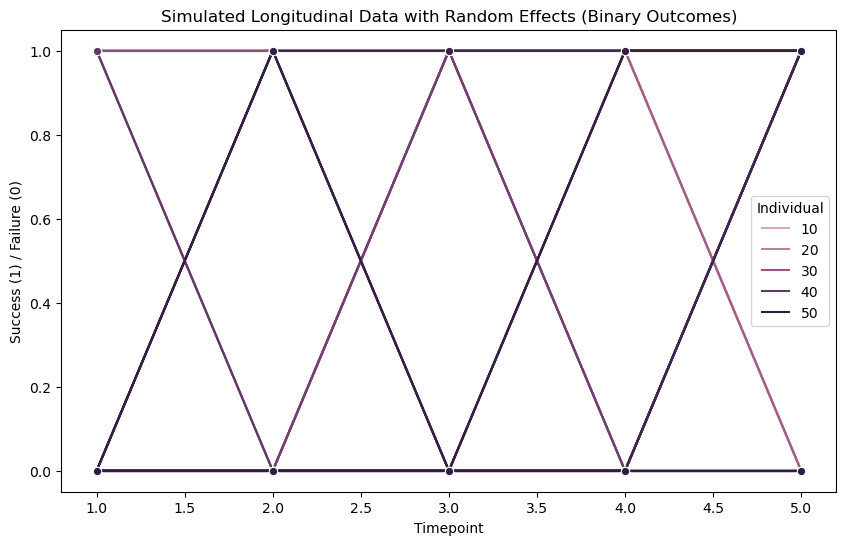

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Success  
No. Observations: 250     Method:             REML     
No. Groups:       50      Scale:              0.1729   
Min. group size:  5       Log-Likelihood:     -164.7320
Max. group size:  5       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
               Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept      0.176    0.071 2.489 0.013  0.037  0.315
Timepoint      0.080    0.019 4.303 0.000  0.044  0.116
Individual Var 0.060    0.051                          



/Users/ithoma/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2137: UserWarning: Argument family not used by MixedLM.fit
  warnings.warn("Argument %s not used by MixedLM.fit" % x)
/Users/ithoma/anaconda3/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: family. After release 0.14, this will raise.
  warnings.warn(


In [57]:
# Part 8: Let's extend the example to a generalised linear mixed model (GLMM) 
# with a binomial distribution and a logit link function. In this case, 
# we'll simulate binary outcomes, such as success/failure, and model the 
# probability of success using a GLMM.

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate data for Part 8
np.random.seed(42)

# Simulate a longitudinal dataset with random intercepts and binary outcomes
num_individuals = 50
num_timepoints = 5

individuals = np.repeat(np.arange(1, num_individuals + 1), num_timepoints)
timepoints = np.tile(np.arange(1, num_timepoints + 1), num_individuals)
random_effects = np.random.normal(0, 2, num_individuals)  # Simulating random intercepts

# Simulating a logistic trend with some noise
true_slope = 0.5
true_intercept = -2
log_odds = true_intercept + true_slope * timepoints + random_effects[individuals - 1] + np.random.normal(0, 1, num_individuals * num_timepoints)

# Transform log-odds to probabilities
probabilities = 1 / (1 + np.exp(-log_odds))

# Simulate binary outcomes (success/failure) based on probabilities
binary_outcomes = np.random.binomial(1, probabilities)

# Create a DataFrame
simulated_data = pd.DataFrame({
    'Individual': individuals,
    'Timepoint': timepoints,
    'Success': binary_outcomes
})

# Display the first few rows of the simulated data
print(simulated_data.head())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Timepoint', y='Success', hue='Individual', data=simulated_data, marker='o')
plt.title('Simulated Longitudinal Data with Random Effects (Binary Outcomes)')
plt.xlabel('Timepoint')
plt.ylabel('Success (1) / Failure (0)')
plt.show()

# Explanation:

#    plt.figure(figsize=(10, 6)): This line creates a new figure for the upcoming plot and sets its size to 10 inches in width and 6 inches in height.

#    sns.lineplot(...): This line uses the Seaborn library (sns) to create a line plot. It visualizes the relationship between the 'Timepoint' variable on the x-axis, the 'Success' variable on the y-axis, and different lines for each 'Individual' (as specified by the hue parameter). The marker='o' argument indicates that each data point should be marked with a circular marker.

#    plt.title('Simulated Longitudinal Data with Random Effects (Binary Outcomes)'): Sets the title of the plot to 'Simulated Longitudinal Data with Random Effects (Binary Outcomes)'.

#    plt.xlabel('Timepoint'): Adds a label to the x-axis, indicating that it represents the 'Timepoint' variable.

#    plt.ylabel('Success (1) / Failure (0)'): Adds a label to the y-axis, indicating that it represents the 'Success' variable, where 1 corresponds to success and 0 corresponds to failure.

#    plt.show(): Finally, this line displays the plot.

# In summary, the code is creating a line plot to visualize the simulated longitudinal data with random effects. Each line represents the success/failure trend over time for an individual, and the different lines are distinguished by color due to the 'hue' parameter. The x-axis represents time, the y-axis represents success/failure, and the plot is annotated with a title and axis labels.

# Generalised Linear Mixed Model (GLMM) Fitting
# Fit a GLMM with a binomial distribution and logit link function
model_glmm = sm.MixedLM.from_formula('Success ~ Timepoint', groups='Individual', data=simulated_data)
result_glmm = model_glmm.fit(family=sm.families.Binomial())

# Display results
print(result_glmm.summary())

